In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../../data/final/original_liv_data_per_year.csv')

In [3]:
df['moving_out'] = df['Vertrek']
df['moving_in'] = (df['Vestiging'] + df['Verhuizing binnen gridcel'] + df['Verhuizing']) / 3
df = df.loc[df['Neighbourhoods'] != 'Hoogeind']


In [4]:
neighborhoods = df['Neighbourhoods'].unique()
data = {}

for neighborhood in neighborhoods:
    data[neighborhood] = []
    df_neighborhood = df[df['Neighbourhoods'] == neighborhood]
    X = df_neighborhood[
        ['green_score', 'GeregistreerdeOverlast_1', 'GeregistreerdeMisdrijven_1',
         'moving_in', 'moving_out']]
    y = df_neighborhood['Livability index'].to_numpy()

    model = RandomForestRegressor()
    model.fit(X, y)
    importances = model.feature_importances_
    data[neighborhood].append(importances)

    split = 5
    X_train, y_train, X_test, y_test = X[:split], y[:split], X[split:], y[split:]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    data[neighborhood].append(preds)
    data[neighborhood].append(y_test)
    data[neighborhood].append(mean_squared_error(y_test, preds))

final_df = pd.DataFrame(data).T
final_df.columns = ['Feature importance', 'pred', 'actual', 'mse']

**Calculating the mean of all the MSE**

In [6]:
# MSE average
import numpy as np
# Extract mse values from final_df
mse_values = final_df['mse'].values

# Calculate mean mse
mean_mse = np.mean(mse_values)

# Print the mean mse
print("Mean Squared Error (MSE):", mean_mse)

Mean Squared Error (MSE): 0.6590045454545455


**Splitting the data into the predicted values and the actual values, then visualizing them in a scatter plot.**

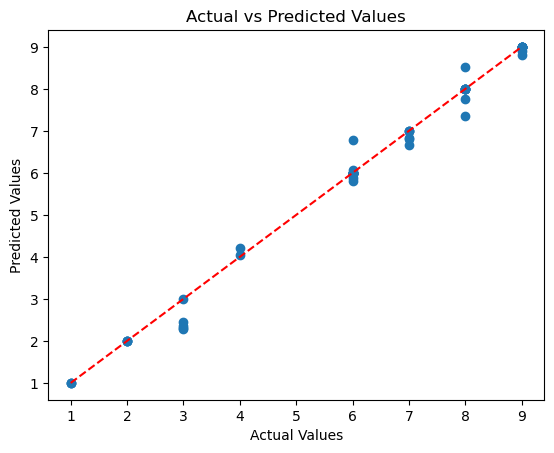

In [7]:
import matplotlib.pyplot as plt

# Extract predicted and actual values
pred_values = final_df['pred'].apply(lambda x: x[0]).values
actual_values = final_df['actual'].apply(lambda x: x[0]).values

# Create a scatter plot
plt.scatter(actual_values, pred_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a diagonal line for reference
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')

# Show the plot
plt.show()


**Visualizing the acual values and the predicted values in a line plot.**

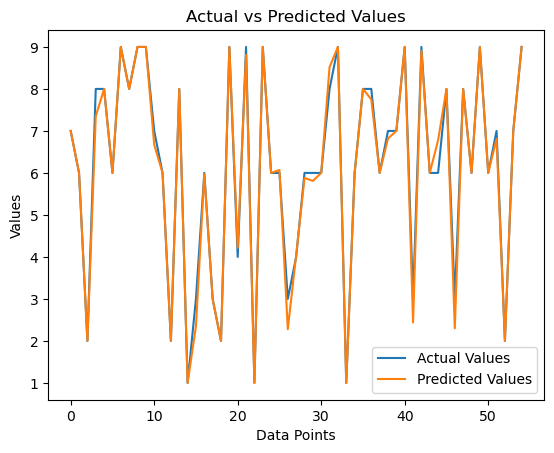

In [8]:
# Create a line plot
plt.plot(actual_values, label='Actual Values')
plt.plot(pred_values, label='Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

**I could see that there were a lot of neighbourhoods with a feature importance of 0. So I ordered the MSE values by ascending order.**

In [9]:
# Sort the DataFrame by 'mse' column in ascending order
sorted_df = final_df.sort_values(by='mse')

# Print the sorted DataFrame
print(sorted_df)

                                                         Feature importance  \
Zandberg                                          [0.0, 0.0, 0.0, 0.0, 0.0]   
Hazeldonk                                         [0.0, 0.0, 0.0, 0.0, 0.0]   
Ypelaar                                           [0.0, 0.0, 0.0, 0.0, 0.0]   
Ginneken                                          [0.0, 0.0, 0.0, 0.0, 0.0]   
Geeren-zuid                                       [0.0, 0.0, 0.0, 0.0, 0.0]   
Moleneind-oost                                    [0.0, 0.0, 0.0, 0.0, 0.0]   
Overkroeten                                       [0.0, 0.0, 0.0, 0.0, 0.0]   
Ruitersbos                                        [0.0, 0.0, 0.0, 0.0, 0.0]   
Emer                                              [0.0, 0.0, 0.0, 0.0, 0.0]   
Effen-Rith                                        [0.0, 0.0, 0.0, 0.0, 0.0]   
Heilaar                                           [0.0, 0.0, 0.0, 0.0, 0.0]   
Doornbos-Linie                                    [0

**Visualizing the MSE values in a bar plot.**

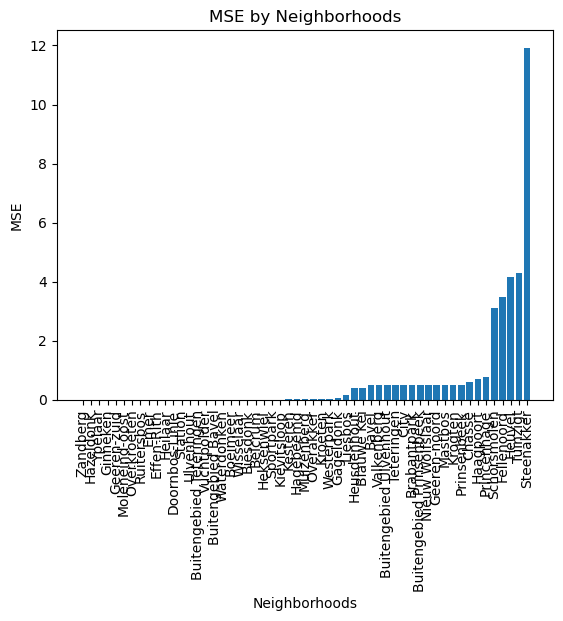

In [10]:
# Create a bar plot
plt.bar(sorted_df.index, sorted_df['mse'])
plt.xlabel('Neighborhoods')
plt.ylabel('MSE')
plt.title('MSE by Neighborhoods')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Visualizing the MSE values in a lineplot.**

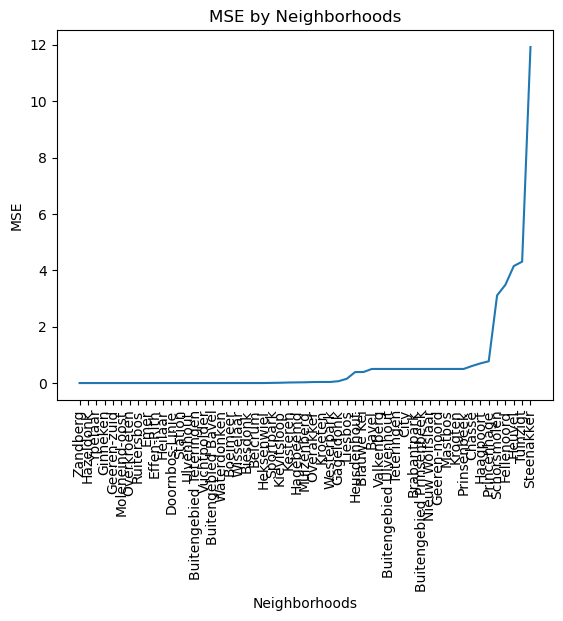

In [11]:
# Create a line plot
plt.plot(sorted_df.index, sorted_df['mse'])
plt.xlabel('Neighborhoods')
plt.ylabel('MSE')
plt.title('MSE by Neighborhoods')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Visualizing the MSE values in a scatterplot.**

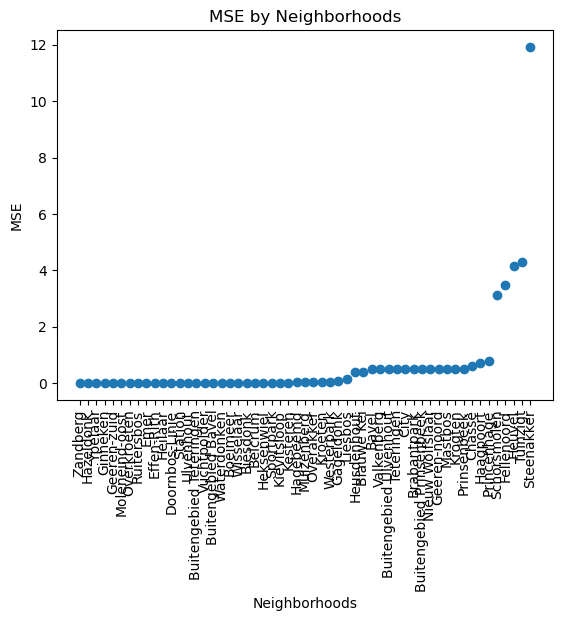

In [12]:
# Create a scatter plot
plt.scatter(sorted_df.index, sorted_df['mse'])
plt.xlabel('Neighborhoods')
plt.ylabel('MSE')
plt.title('MSE by Neighborhoods')
plt.xticks(rotation=90)

# Show the plot
plt.show()